In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from fbg import *
from scipy.signal import find_peaks, peak_prominences

In [2]:
filepath = 'demos/spectra_files/psg_trn.txt'
data = psg_to_numpy(filepath, verbose=False)

In [ ]:
data
# test sync

array([[1.6     , 0.999999, 0.999999],
       [1.60001 , 1.      , 1.      ],
       [1.60002 , 1.      , 1.      ],
       ...,
       [1.89997 , 0.999948, 0.999948],
       [1.89998 , 0.999909, 0.999909],
       [1.89999 , 0.999781, 0.999781]])

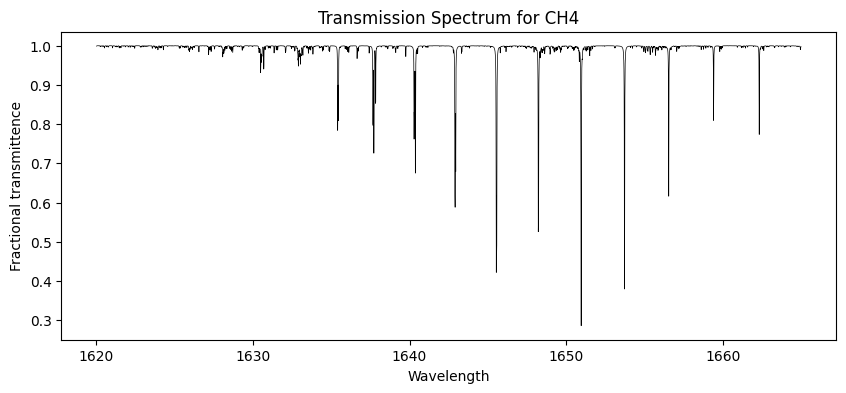

In [4]:
wavelength = data[:,0]*1e3 # converts units to nm
index =  np.where((wavelength>1620) & (wavelength<=1665))[0] # look at a small subset of the data

plt.figure(figsize=(10,4))
plt.plot(wavelength[index], data[index, 1], color='black', linewidth=0.5)
plt.xlabel('Wavelength')
plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.show()

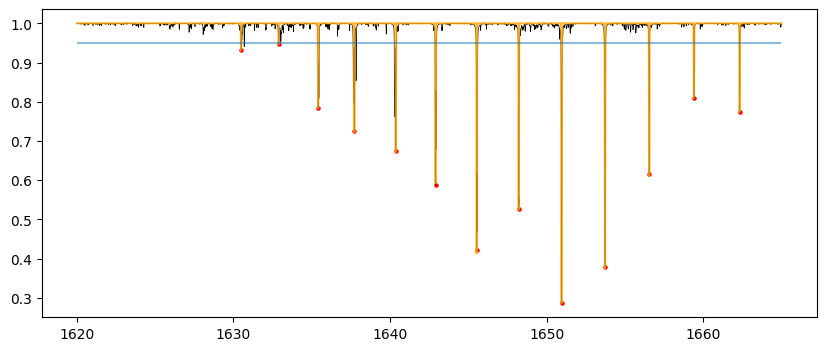

In [5]:
subset = data[index,:]
subset[:,0] = subset[:,0] * 1e3 # Convert wavelength to nm

# Plot original spectrum
plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5)

# Plot the simulated FBG
threshold_value = 0.95
peaks, properties = locate_peaks(subset[:, 1], threshold=threshold_value, distance=100) # distance=100 correspond to 1nm
wavelength_gauss, trans_gauss = generate_spectrum(subset, peaks, 0, n=10000, sigma=1e-2, type='Gaussian')
plt.scatter(subset[peaks, 0], subset[peaks, 1], color='red', s=5)
plt.plot(wavelength_gauss, trans_gauss, color='orange', alpha=0.8, label='Gaussian model')
plt.hlines(threshold_value, subset[:, 0].min(), subset[:, 0].max(), alpha=0.5, label='threshold')




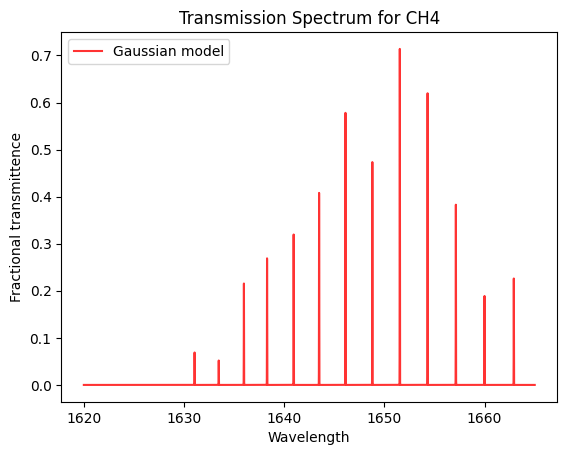

In [6]:
#Apply strain to the FBG
strain = 500
wavelength_gauss, trans_gauss = generate_spectrum(subset, peaks, strain, n=10000, sigma=1e-2, type='Gaussian')
plt.plot(wavelength_gauss, 1-trans_gauss, color='red', alpha=0.8, label='Gaussian model')

plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence'); 
plt.title('Transmission Spectrum for CH4')
plt.legend()
plt.show()

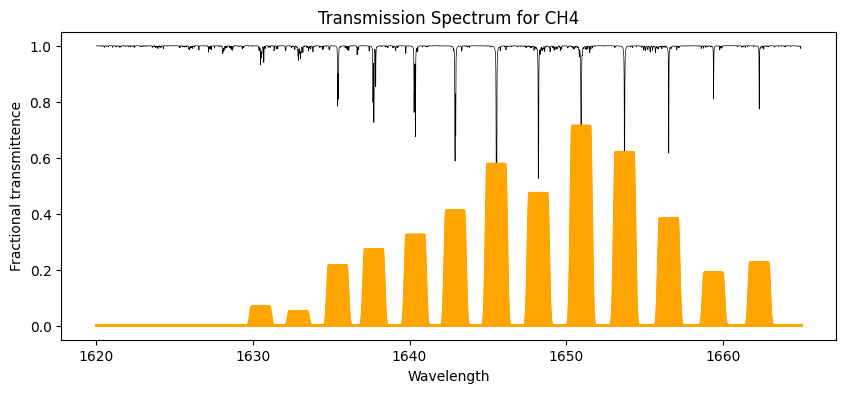

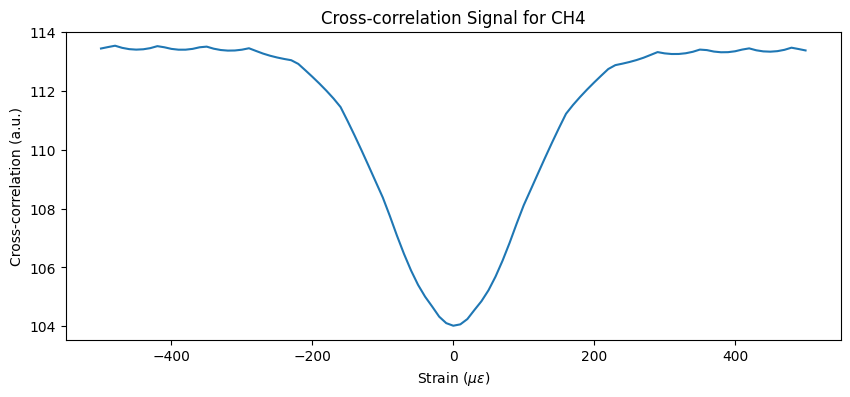

In [7]:
step = 101
strain = np.linspace(-500, 500, step)
cross_correlation = np.zeros(step)

plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')
for i in range(len(strain)): 
    wavelength_gauss, trans_gauss = generate_spectrum(subset, peaks, strain[i], n=len(index), sigma=1e-1, type='Gaussian')
    cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for CH4')
plt.show()

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbg import *

import os

# Get the directory of the current script
current_dir = os.getcwd()
filepath = os.path.join(current_dir, 'custom', 'f1_trn.txt')
print(filepath)
# Load the data with sep='\s+' to handle whitespace and skip the header lines
data_df = pd.read_csv(
    filepath, 
    sep='\s+',          # Use regex for whitespace
    skiprows=11,        # Skip header lines (adjust if needed)
    names=["Wavelength", "Total", "H2O", "CO2", "O3", "N2O", "CO", "CH4", "O2", "N2"]  # Define column names
)

# Display the first few rows to confirm correct loading
print(data_df.head())

# Define the wavelength range
wavelength_min = 1.620
wavelength_max = 1.665

# Filter the DataFrame based on the wavelength range
subset_data = data_df[(data_df["Wavelength"] > wavelength_min) & (data_df["Wavelength"] <= wavelength_max)]

# Display the subset data to confirm
print(subset_data.head())

/home/bina/FBG-Sensor/code/custom/f1_trn.txt
   Wavelength     Total       H2O       CO2   O3  N2O   CO  CH4   O2   N2
0     1.60003  0.983104  0.999482  0.983614  1.0  1.0  1.0  1.0  1.0  1.0
1     1.60004  0.978399  0.999542  0.978847  1.0  1.0  1.0  1.0  1.0  1.0
2     1.60005  0.968306  0.999596  0.968698  1.0  1.0  1.0  1.0  1.0  1.0
3     1.60006  0.946089  0.999640  0.946430  1.0  1.0  1.0  1.0  1.0  1.0
4     1.60007  0.888340  0.999674  0.888630  1.0  1.0  1.0  1.0  1.0  1.0
      Wavelength     Total       H2O       CO2   O3       N2O   CO       CH4  \
1998     1.62001  0.998083  0.999726  0.999479  1.0  0.999998  1.0  0.998880   
1999     1.62002  0.998429  0.999586  0.999444  1.0  0.999999  1.0  0.999400   
2000     1.62003  0.998685  0.999731  0.999359  1.0  0.999999  1.0  0.999595   
2001     1.62004  0.998795  0.999830  0.999206  1.0  0.999999  1.0  0.999759   
2002     1.62005  0.998630  0.999859  0.998937  1.0  0.999999  1.0  0.999835   

       O2   N2  
1998  1.0  1.

/tmp/ipykernel_76368/41963198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data["Wavelength"] = subset_data["Wavelength"] * 1e3  # Convert to nm


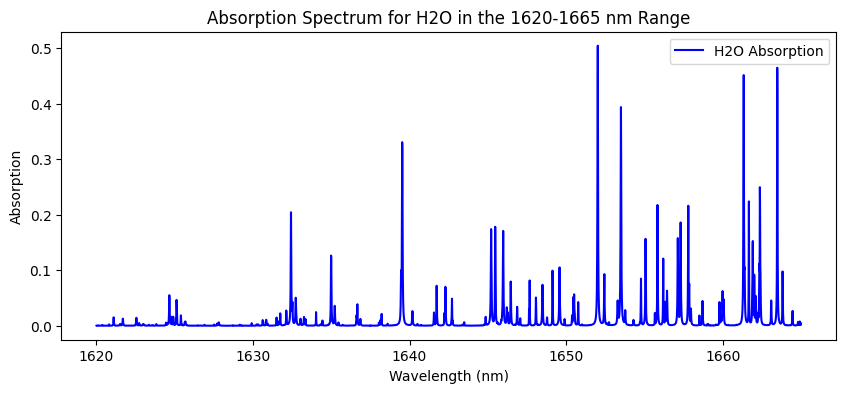

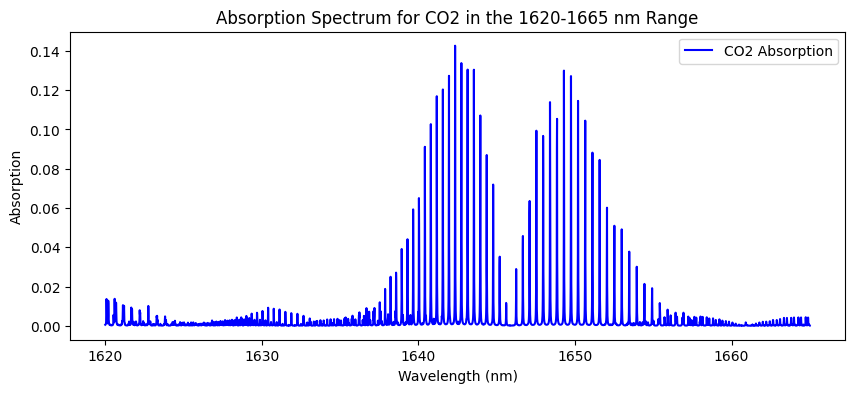

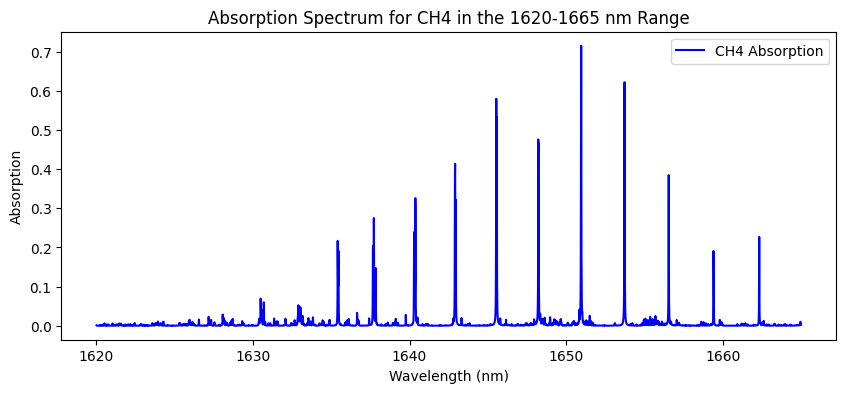

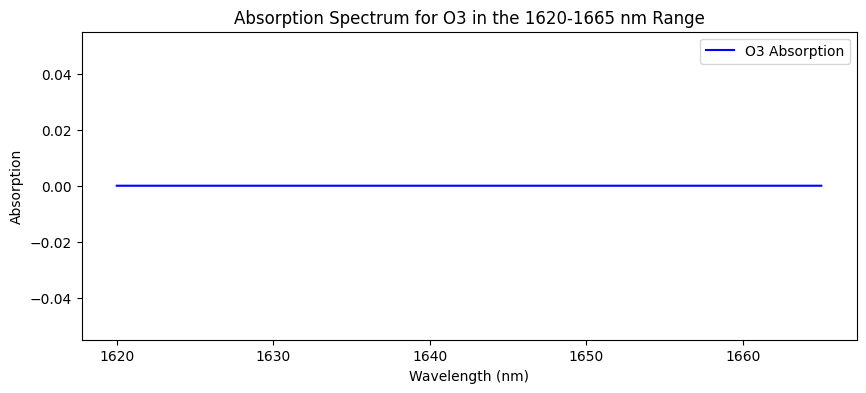

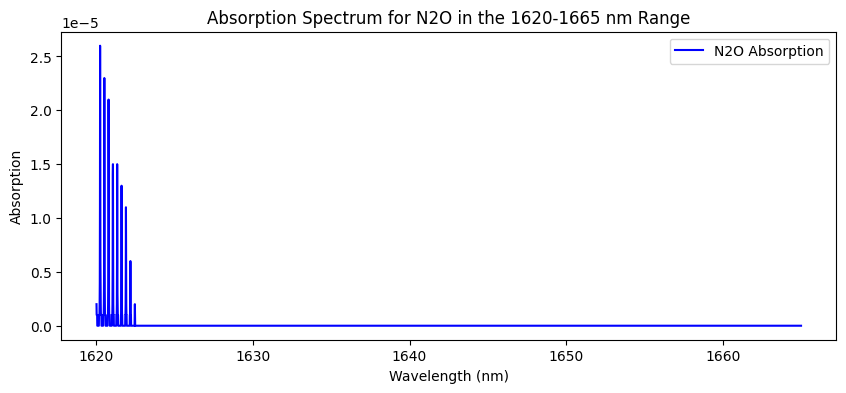

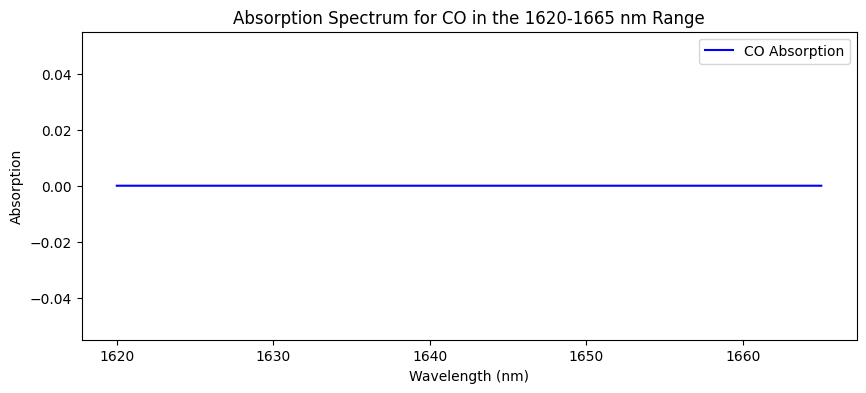

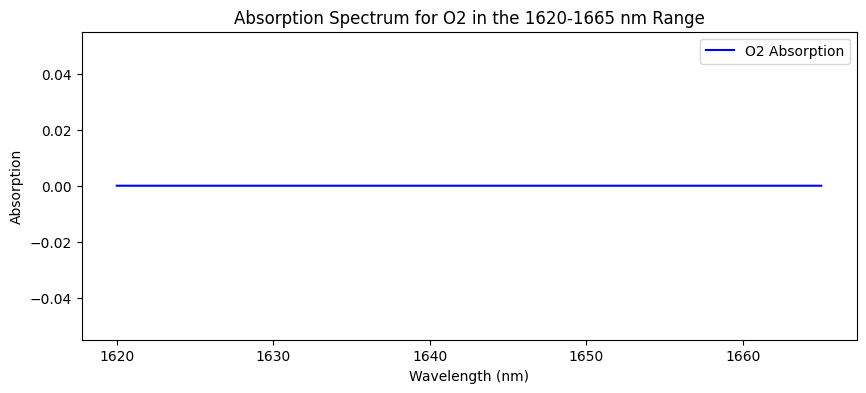

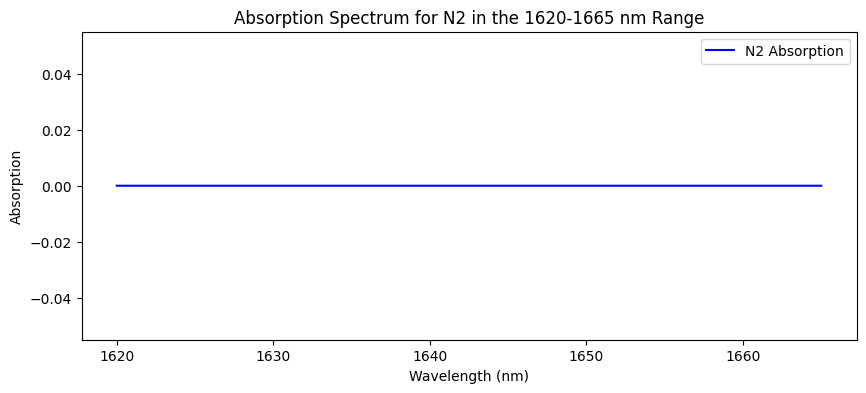

In [9]:
# Convert Wavelength to nanometers directly in the DataFrame
subset_data["Wavelength"] = subset_data["Wavelength"] * 1e3  # Convert to nm

# Define the wavelength range of interest (1620 nm to 1665 nm)
index = np.where((subset_data["Wavelength"] > 1620) & (subset_data["Wavelength"] <= 1665))[0]

# List of gases to plot absorption spectra for
gases = ["H2O", "CO2", "CH4", "O3", "N2O", "CO", "O2", "N2"]

# Plot absorption spectrum for each gas individually
for gas in gases:
    plt.figure(figsize=(10, 4))
    absorption = 1 - subset_data[gas].values  # Calculate absorption as 1 - transmittance
    plt.plot(subset_data["Wavelength"].values[index], absorption[index], label=f'{gas} Absorption', color='blue')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absorption')
    plt.title(f'Absorption Spectrum for {gas} in the 1620-1665 nm Range')
    plt.legend()
    plt.show()


In [10]:
data_check = subset_data[["Wavelength","Total","H2O", "CO2", "CH4"]]

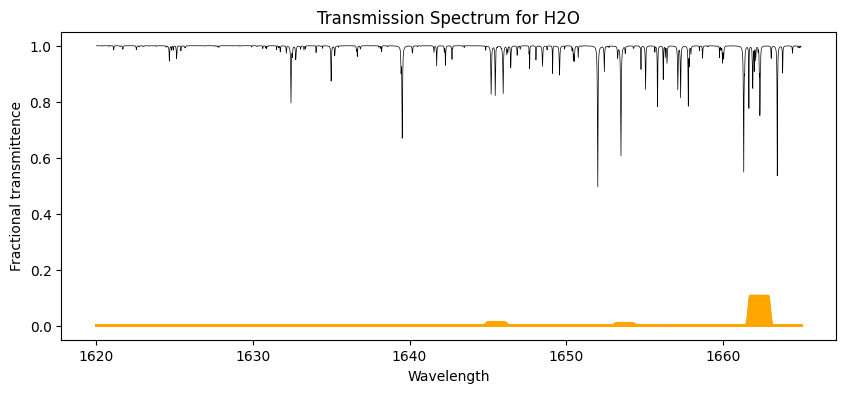

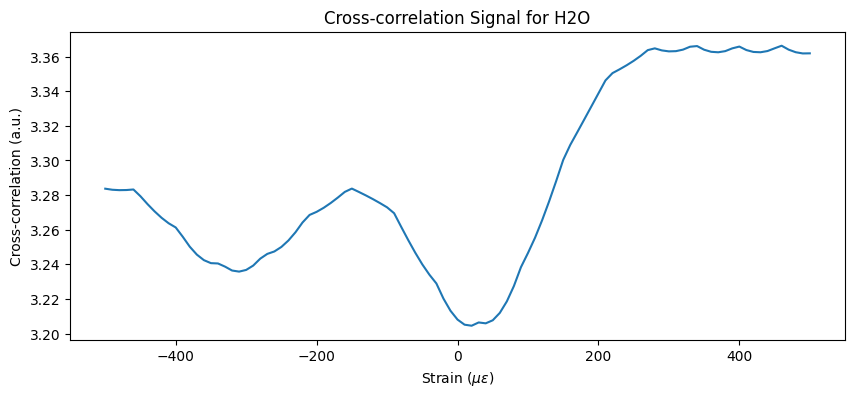

The signal peak prominence is: [0.07924296]


In [11]:
subset =data_check[["Wavelength", "H2O"]].to_numpy()

step = 101
strain = np.linspace(-500, 500, step)
cross_correlation = np.zeros(step)

plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')
for i in range(len(strain)): 
    wavelength_gauss, trans_gauss = generate_spectrum(subset, peaks, strain[i], n=len(index), sigma=1e-1, type='Gaussian')
    cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for H2O')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for H2O')
plt.show()
peaks_SCC, _ = find_peaks(-cross_correlation, distance=step)
prominences = peak_prominences(-cross_correlation, peaks_SCC)[0]
print("The signal peak prominence is:",prominences)

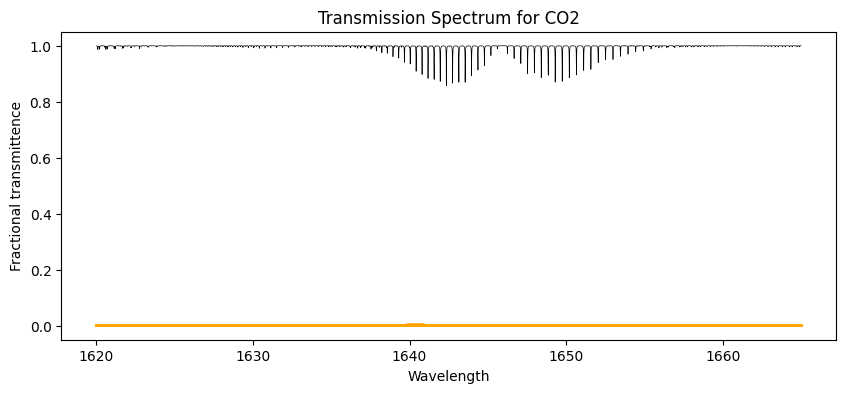

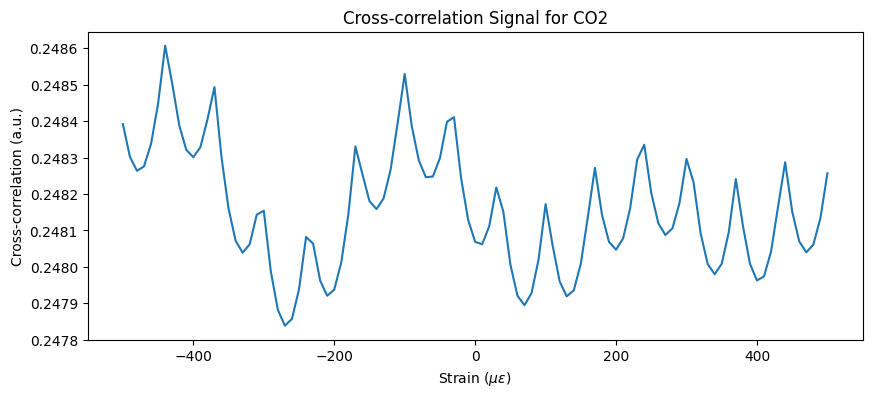

The signal peak prominence is: [0.00069133]


In [12]:
subset =data_check[["Wavelength", "CO2"]].to_numpy()
step = 101
strain = np.linspace(-500, 500, step)
cross_correlation = np.zeros(step)

plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')
for i in range(len(strain)): 
    wavelength_gauss, trans_gauss = generate_spectrum(subset, peaks, strain[i], n=len(index), sigma=1e-1, type='Gaussian')
    cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CO2')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for CO2')
plt.show()
peaks_SCC, _ = find_peaks(-cross_correlation, distance=step)
prominences = peak_prominences(-cross_correlation, peaks_SCC)[0]
print("The signal peak prominence is:",prominences)

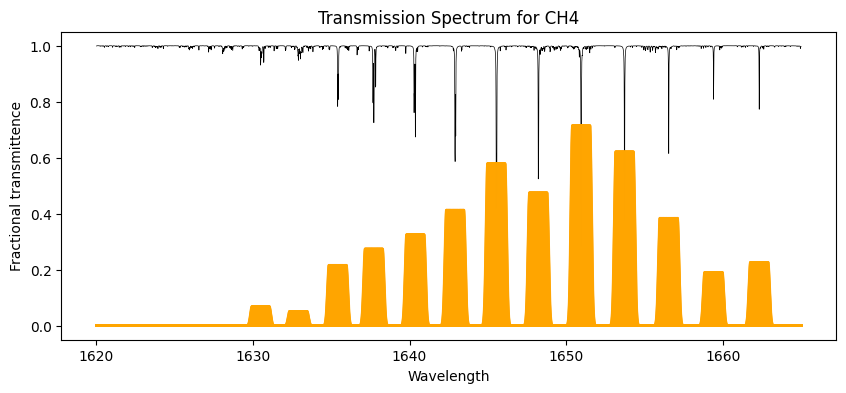

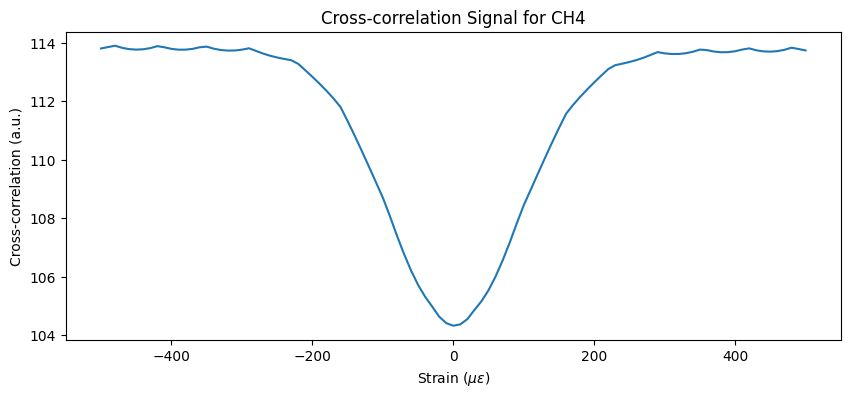

The signal peak prominence is: [9.52489959]


In [13]:
subset =data_check[["Wavelength", "CH4"]].to_numpy()
step = 101
strain = np.linspace(-500, 500, step)
cross_correlation = np.zeros(step)

plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')
for i in range(len(strain)): 
    wavelength_gauss, trans_gauss = generate_spectrum(subset, peaks, strain[i], n=len(index), sigma=1e-1, type='Gaussian')
    cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for CH4')
plt.show()
peaks_SCC, _ = find_peaks(-cross_correlation, distance=step)
prominences = peak_prominences(-cross_correlation, peaks_SCC)[0]
print("The signal peak prominence is:",prominences)

In [14]:
def generate_spectrum_height(data, peaks, height, strain, n=None, sigma=1e-5, type='Gaussian'):
    
    locs = data[peaks, 0]* (1+7e-7 * strain)
    heights = height * np.ones(len(peaks))

    if n is None:
        n = len(data)

    wavelengths = np.linspace(data[:, 0].min(), data[:, 0].max(), n)
    transmittence = np.zeros(n)

    if type == 'Gaussian':
        for i in range(len(peaks)):
            transmittence += gaussian(wavelengths, sigma=sigma, mu=locs[i], amp=heights[i])
    elif type == 'Lorentzian':
        for i in range(len(peaks)):
            transmittence += lorentzian(wavelengths, sigma=sigma, mu=locs[i], amp=heights[i])
    else:
        print('Error: you need to specify a type of function to model the peak')

    transmittence *= heights.max()/transmittence.max()
    transmittence = 1 - transmittence

    return wavelengths, transmittence

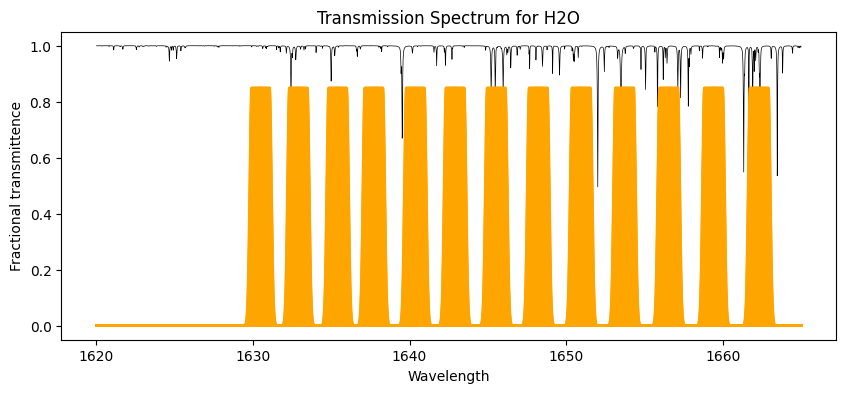

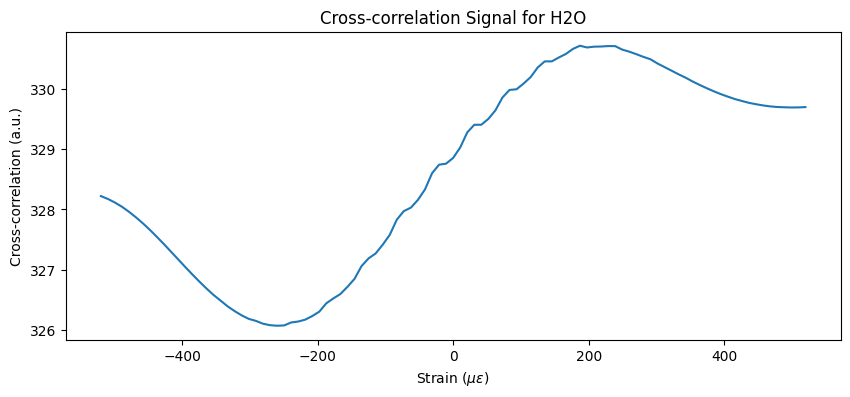

The signal peak prominence is: [2.15637194]


In [15]:
step = 101
strain = np.linspace(-520, 520, step)
cross_correlation = np.zeros(step)
subset =data_check[["Wavelength", "H2O"]].to_numpy()
plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')
for i in range(len(strain)): 
    wavelength_gauss, trans_gauss = generate_spectrum_height(subset, peaks, 0.85, strain[i], n=len(index), sigma=1.2e-1, type='Gaussian')
    cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for H2O')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for H2O')
plt.show()
peaks_SCC, _ = find_peaks(-cross_correlation, distance=step)
prominences = peak_prominences(-cross_correlation, peaks_SCC)[0]
print("The signal peak prominence is:",prominences)
# mean_noise = np.mean(cross_correlation[0:100])
# print("The mean noise level is:",mean_noise)




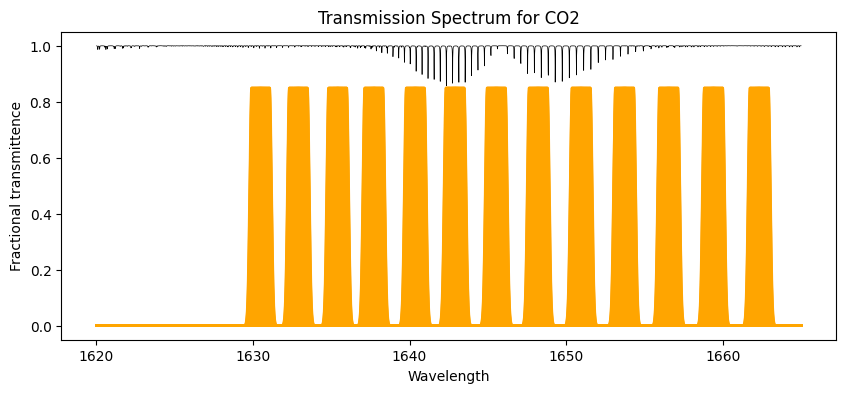

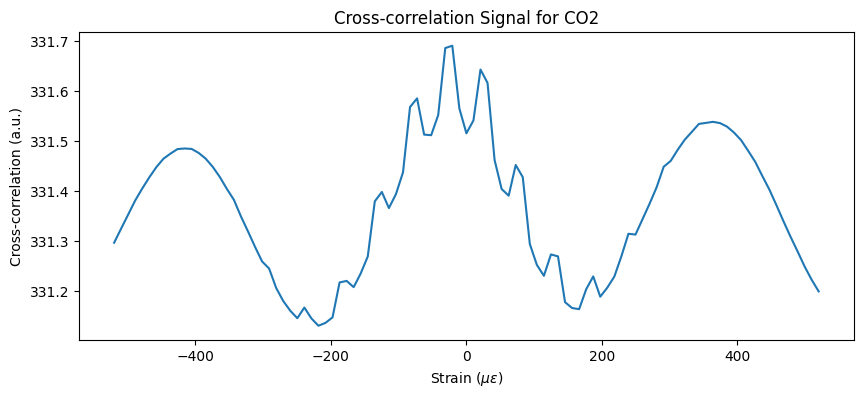

The signal peak prominence is: [0.35443419]


In [16]:
step = 101
strain = np.linspace(-520, 520, step)
cross_correlation = np.zeros(step)
subset =data_check[["Wavelength", "CO2"]].to_numpy()
plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')
for i in range(len(strain)): 
    wavelength_gauss, trans_gauss = generate_spectrum_height(subset, peaks, 0.85, strain[i], n=len(index), sigma=1.2e-1, type='Gaussian')
    cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CO2')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for CO2')
plt.show()
peaks_SCC, _ = find_peaks(-cross_correlation, distance=step)
prominences = peak_prominences(-cross_correlation, peaks_SCC)[0]
print("The signal peak prominence is:",prominences)
# mean_noise = np.mean(cross_correlation[0:100])
# print("The mean noise level is:",mean_noise)




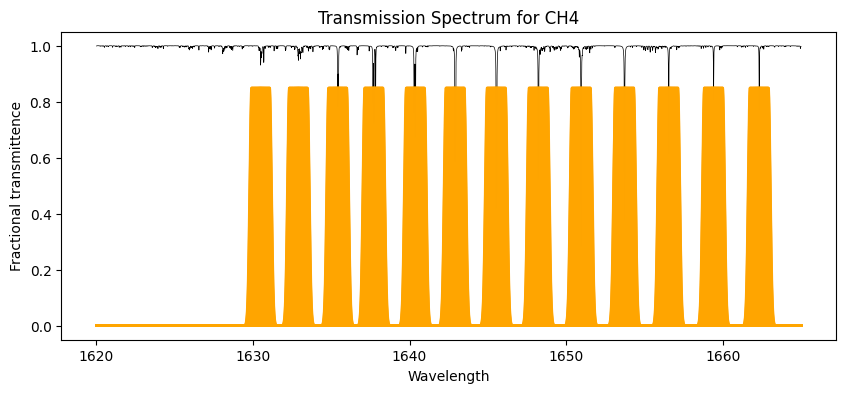

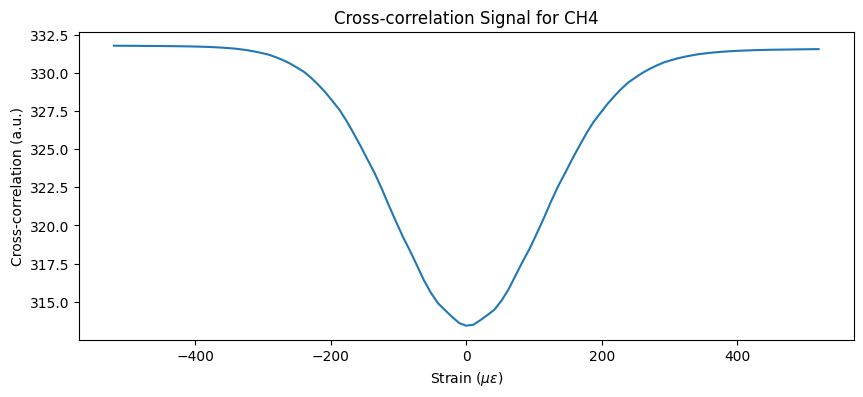

The signal peak prominence is: [18.11142818]


In [17]:
step = 101
strain = np.linspace(-520, 520, step)
cross_correlation = np.zeros(step)
subset =data_check[["Wavelength", "CH4"]].to_numpy()
plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')
for i in range(len(strain)): 
    wavelength_gauss, trans_gauss = generate_spectrum_height(subset, peaks, 0.85, strain[i], n=len(index), sigma=1.2e-1, type='Gaussian')
    cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for CH4')
plt.show()
peaks_SCC, _ = find_peaks(-cross_correlation, distance=step)
prominences = peak_prominences(-cross_correlation, peaks_SCC)[0]
print("The signal peak prominence is:",prominences)
# mean_noise = np.mean(cross_correlation[0:100])
# print("The mean noise level is:",mean_noise)



In [18]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# Gases for consideration
target_gas = "CH4"
penalized_gases = ["H2O", "CO2"]

# Define cross-correlation objective function
def objective(params):
    strain, height, sigma = params
    target_score = 0
    penalty = 0
    
    print(f"\nEvaluating with strain={strain}, height={height}, sigma={sigma}")
    
    # Loop through target and penalized gases
    for gas in [target_gas] + penalized_gases:
        subset = data_check[["Wavelength", gas]].to_numpy()
        peaks = np.arange(len(subset))  # Use all points as peaks
        
        # Generate spectrum and compute cross-correlation
        wavelength_gauss, trans_gauss = generate_spectrum_height(
            subset, peaks, height, strain, n=len(subset), sigma=sigma, type='Gaussian'
        )
        cross_corr_score = np.sum(np.multiply((1 - trans_gauss), subset[:, 1]))
        
        # Assign score to target gas or add to penalty for other gases
        if gas == target_gas:
            target_score = cross_corr_score
            print(f"  Cross-correlation score for {target_gas}: {cross_corr_score}")
        else:
            penalty += cross_corr_score
            print(f"  Cross-correlation score for {gas} (penalized): {cross_corr_score}")
    
    # Display net score before returning
    net_score = -target_score + penalty
    print(f"Net objective score (to minimize): {net_score}")
    
    # Objective: maximize target gas score, minimize others
    return net_score

# Define bounds and initial guess for (strain, height, sigma)
bounds = [(-100, 1000), (0.75, 0.95), (0.1, 0.15)]
initial_guess = [518, 0.85, 0.12]




In [19]:
result = minimize(objective, initial_guess, bounds=bounds, method='L-BFGS-B')
# Extract and display the best parameters
best_strain, best_height, best_sigma = result.x
print(f"\nOptimal parameters for methane detection:")
print(f"Strain: {best_strain:.2f}, Height: {best_height:.2f}, Sigma: {best_sigma:.2f}")
print(f"Optimized Cross-correlation Score for CH4: {-result.fun:.4f}")


Evaluating with strain=518.0, height=0.85, sigma=0.12
  Cross-correlation score for CH4: 3747.8277084538595
  Cross-correlation score for H2O (penalized): 3738.7644077913524
  Cross-correlation score for CO2 (penalized): 3764.9633637819015
Net objective score (to minimize): 3755.900063119395

Evaluating with strain=518.00000001, height=0.85, sigma=0.12
  Cross-correlation score for CH4: 3747.827708452888
  Cross-correlation score for H2O (penalized): 3738.7644077903797
  Cross-correlation score for CO2 (penalized): 3764.963363780932
Net objective score (to minimize): 3755.9000631184235

Evaluating with strain=518.0, height=0.85000001, sigma=0.12
  Cross-correlation score for CH4: 3747.827752545948
  Cross-correlation score for H2O (penalized): 3738.764451776813
  Cross-correlation score for CO2 (penalized): 3764.963408075586
Net objective score (to minimize): 3755.900107306451

Evaluating with strain=518.0, height=0.85, sigma=0.12000000999999999
  Cross-correlation score for CH4: 3747

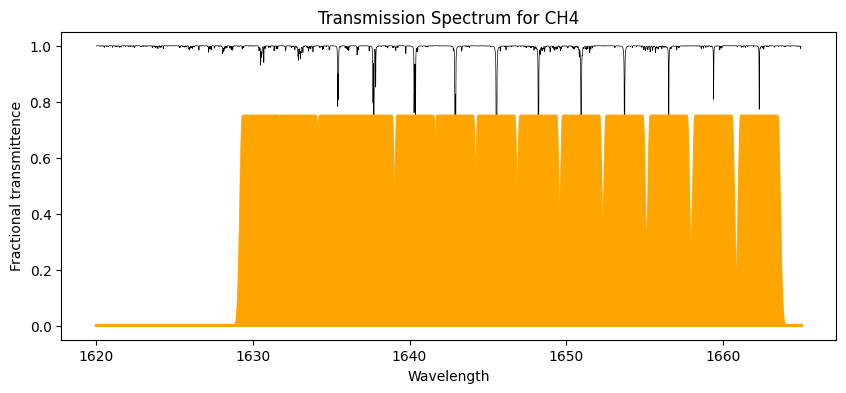

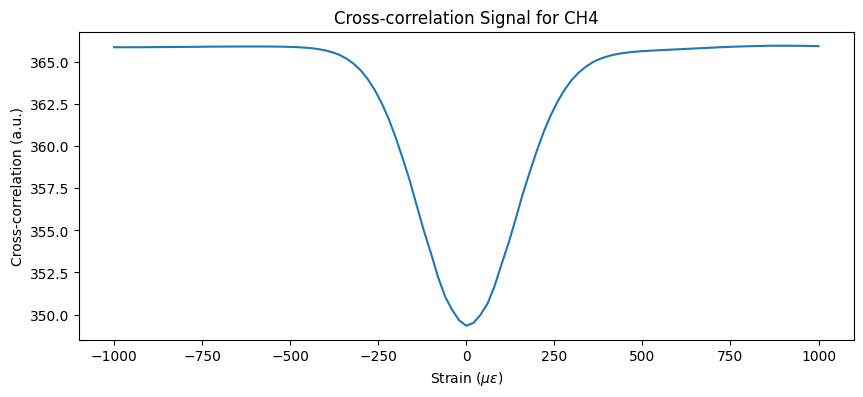

The signal peak prominence is: [16.58283866]


In [20]:
step = 101
strain = np.linspace(-1000, 1000, step)
cross_correlation = np.zeros(step)
subset =data_check[["Wavelength", "CH4"]].to_numpy()
plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')
for i in range(len(strain)): 
    wavelength_gauss, trans_gauss = generate_spectrum_height(subset, peaks, 0.75, strain[i], n=len(index), sigma=1.5e-1, type='Gaussian')
    cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for CH4')
plt.show()
peaks_SCC, _ = find_peaks(-cross_correlation, distance=step)
prominences = peak_prominences(-cross_correlation, peaks_SCC)[0]
print("The signal peak prominence is:",prominences)
# mean_noise = np.mean(cross_correlation[0:100])
# print("The mean noise level is:",mean_noise)




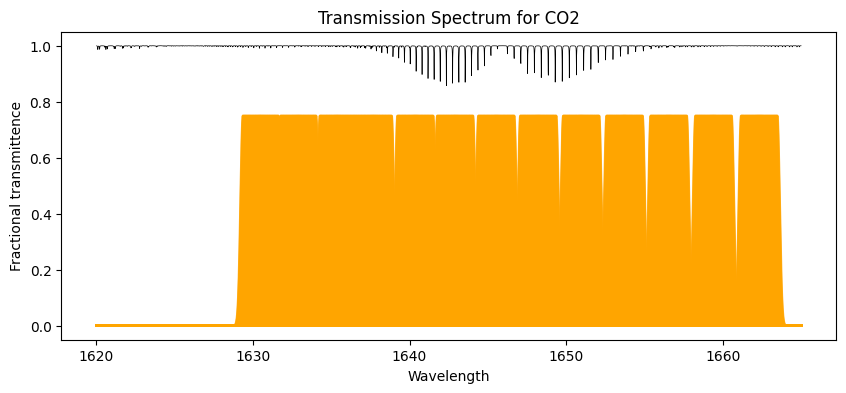

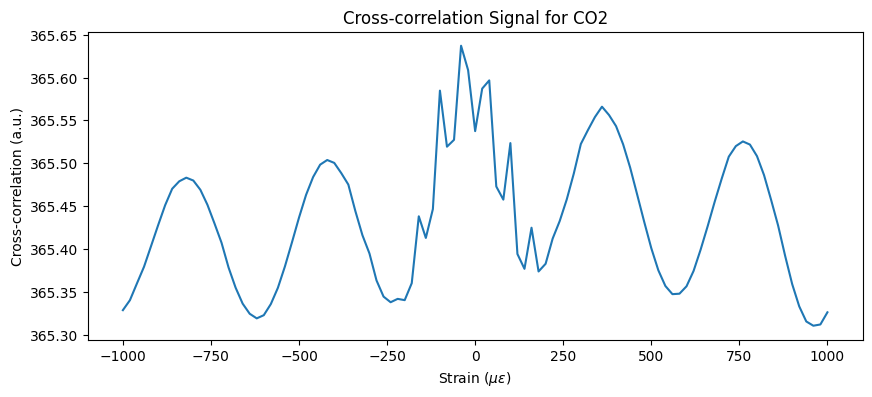

The signal peak prominence is: [0.01567017]


In [21]:
step = 101
strain = np.linspace(-1000, 1000, step)
cross_correlation = np.zeros(step)
subset =data_check[["Wavelength", "CO2"]].to_numpy()
plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')
for i in range(len(strain)): 
    wavelength_gauss, trans_gauss = generate_spectrum_height(subset, peaks, 0.75, strain[i], n=len(index), sigma=1.5e-1, type='Gaussian')
    cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CO2')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for CO2')
plt.show()
peaks_SCC, _ = find_peaks(-cross_correlation, distance=step)
prominences = peak_prominences(-cross_correlation, peaks_SCC)[0]
print("The signal peak prominence is:",prominences)
# mean_noise = np.mean(cross_correlation[0:100])
# print("The mean noise level is:",mean_noise)

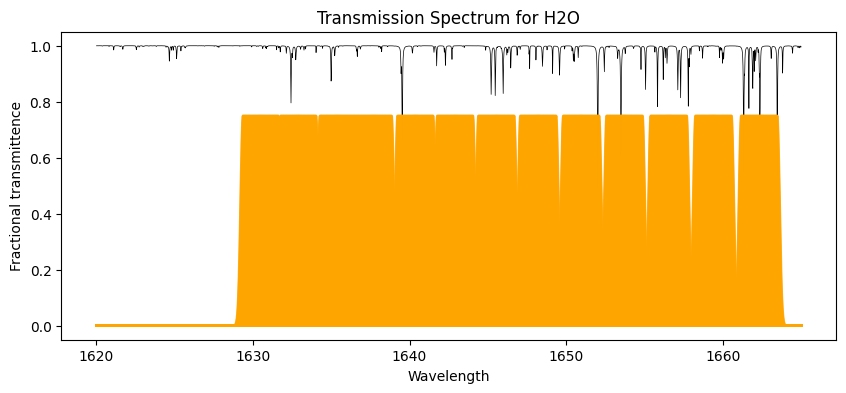

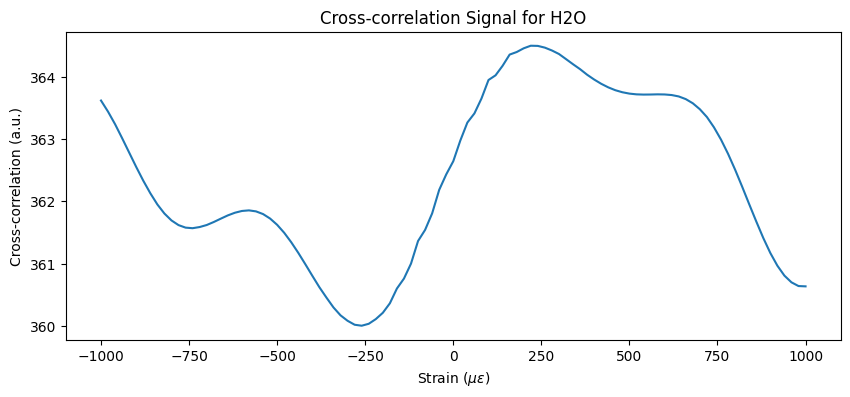

The signal peak prominence is: [3.61810766]


In [22]:
step = 101
strain = np.linspace(-1000, 1000, step)
cross_correlation = np.zeros(step)
subset =data_check[["Wavelength", "H2O"]].to_numpy()
plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')
for i in range(len(strain)): 
    wavelength_gauss, trans_gauss = generate_spectrum_height(subset, peaks, 0.75, strain[i], n=len(index), sigma=1.5e-1, type='Gaussian')
    cross_correlation[i] = np.sum(np.multiply((1-trans_gauss), subset[:,1]))
    plt.plot(wavelength_gauss, 1-trans_gauss, '-', color='orange', alpha=0.8, label='Gaussian model')
plt.xlabel('Wavelength'); plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for H2O')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(strain, cross_correlation)
plt.xlabel('Strain ($\mu\epsilon$)'); plt.ylabel('Cross-correlation (a.u.)')
plt.title('Cross-correlation Signal for H2O')
plt.show()
peaks_SCC, _ = find_peaks(-cross_correlation, distance=step)
prominences = peak_prominences(-cross_correlation, peaks_SCC)[0]
print("The signal peak prominence is:",prominences)
# mean_noise = np.mean(cross_correlation[0:100])
# print("The mean noise level is:",mean_noise)